# STRATEGY & ANALYSIS 

Assignment #1\
Creator: Nikolas Hermanowycz\


1. Calculate the average survival rates by pclass, sex, sibsp, parch, and embarked.
2. Bucket the data by agequartiles and farequartilesto calculate the average survival rate for each quartile and plot the result as a bar plot.
3. Calculate the correlation between the survival column and the rest of the columns. What are top 3 most important attributes to determine the likelihood of survival?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import random

In [16]:
buan = pd.read_csv("baun685_hw1_titanic_data.csv")  
print(buan)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [11]:
buan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
buan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Survival Rates

Pclass

In [68]:
print('Average Survival Rate By Class')
print (buan.groupby('Pclass').Survived.mean())


#p = buan[['Survived', 'Pclass']].groupby('Survived')['Pclass'].mean

Average Survival Rate By Class
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [67]:
print('Average Survival Rate By Sex')
print (buan.groupby('Sex').Survived.mean())

Average Survival Rate By Sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [71]:
print('Average Survival Rate By SibSp')
print (buan.groupby('SibSp').Survived.mean())

Average Survival Rate By SibSp
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


In [73]:
print('Average Survival Rate By Parch')
print (buan.groupby('Parch').Survived.mean())

Average Survival Rate By Parch
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


In [75]:
print('Average Survival Rate By Embarked')
e = (buan.groupby('Embarked').Survived.mean())
print(e)

Average Survival Rate By Embarked
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


# Bucketing


2. Bucket the data by agequartiles and farequartilesto calculate the average survival rate for each quartile and plot the result as a bar plot.

AgeQuartiles

In [118]:
buan['Age'].rank()/len(buan)/0.25

0      0.978676
1      2.388328
2      1.393939
3      2.193042
4      2.193042
         ...   
886    1.474747
887    0.682379
888         NaN
889    1.393939
890    1.964085
Name: Age, Length: 891, dtype: float64

In [121]:
buan['ageQuart'] = np.ceil(buan['Age'].rank()/len(buan)/0.25)
buan['ageQuart'].value_counts()

1.0    231
3.0    218
2.0    215
4.0     50
Name: ageQuart, dtype: int64

In [128]:
buan.groupby('ageQuart')['Survived'].mean()

ageQuart
1.0    0.424242
2.0    0.395349
3.0    0.417431
4.0    0.320000
Name: Survived, dtype: float64

,ageQuart,Survived
0,1.0,0.424242
1,2.0,0.395349
2,3.0,0.417431
3,4.0,0.320000


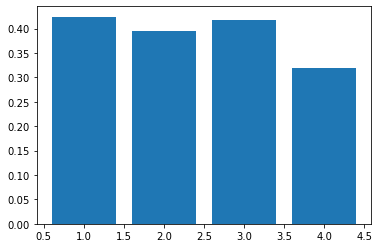

In [129]:
dfplot = buan.groupby('ageQuart')['Survived'].mean().reset_index()
plt.bar(dfplot['ageQuart'], dfplot['Survived'])
buan.groupby('ageQuart')['Survived'].mean().reset_index()

FareQuartiles

In [130]:
buan['Fare'].rank()/len(buan)/0.25

0      0.345679
1      3.542088
2      1.043771
3      3.358025
4      1.185185
         ...   
886    1.829405
887    2.938272
888    2.453423
889    2.938272
890    0.554433
Name: Fare, Length: 891, dtype: float64

In [132]:
buan['fareQuart'] = np.ceil(buan['Fare'].rank()/len(buan)/0.25)
buan['fareQuart'].value_counts()

2.0    224
1.0    223
3.0    222
4.0    222
Name: fareQuart, dtype: int64

In [139]:
buan.groupby('fareQuart')['Survived'].mean()

fareQuart
1.0    0.197309
2.0    0.303571
3.0    0.454955
4.0    0.581081
Name: Survived, dtype: float64

,fareQuart,Survived
0,1.0,0.197309
1,2.0,0.303571
2,3.0,0.454955
3,4.0,0.581081


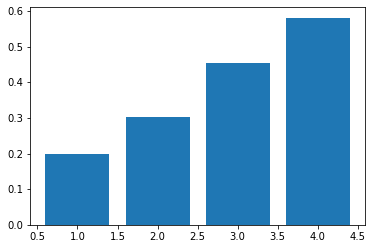

In [140]:
dfplot2 = buan.groupby('fareQuart')['Survived'].mean().reset_index()
plt.bar(dfplot2['fareQuart'], dfplot2['Survived'])
buan.groupby('fareQuart')['Survived'].mean().reset_index()

# Survival Correlation:

3. Calculate the correlation between the survival column and the rest of the columns. What are top 3 most important attributes to determine the likelihood of survival?

In [154]:
#get dummies creates multiple columns from one column
corr = pd.get_dummies(buan).corr().abs()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SurvQuart,ageQuart,fareQuart,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,0.005007,0.035144,0.036847,0.057527,0.001652,0.012658,0.041117,0.032853,0.022998,...,0.009220,0.049263,0.030733,0.043137,0.008206,0.060049,0.013814,0.001205,0.033606,0.022148
Survived,0.005007,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307,0.052565,0.031173,0.299357,...,0.037436,0.033803,0.073642,0.026456,0.060095,0.016040,0.026456,0.168240,0.003650,0.155660
Pclass,0.035144,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500,0.365892,0.375910,0.634271,...,0.039243,0.021469,0.021469,0.027734,0.017519,0.055561,0.052496,0.243292,0.221009,0.081720
Age,0.036847,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067,0.965994,0.918110,0.086846,...,0.028110,0.070995,0.003128,NaN,0.099305,0.077296,0.039474,0.036261,0.022405,0.032523
SibSp,0.057527,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651,0.288838,0.222537,0.393025,...,0.022508,0.007576,0.027582,0.015907,0.063564,0.001402,0.015907,0.059528,0.026354,0.070941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cabin_G6,0.060049,0.016040,0.055561,0.077296,0.001402,0.072388,0.025180,0.067208,0.049362,0.000169,...,0.003185,0.003903,0.003903,0.002251,0.003185,1.000000,0.002251,0.032371,0.020654,0.041589
Cabin_T,0.013814,0.026456,0.052496,0.039474,0.015907,0.015878,0.002224,0.045075,0.034780,0.045076,...,0.001590,0.001948,0.001948,0.001124,0.001590,0.002251,1.000000,0.016158,0.010310,0.020759
Embarked_C,0.001205,0.168240,0.243292,0.036261,0.059528,0.011069,0.269335,0.026482,0.042833,0.186073,...,0.022864,0.028018,0.028018,0.016158,0.022864,0.032371,0.016158,1.000000,0.148258,0.778359
Embarked_Q,0.033606,0.003650,0.221009,0.022405,0.026354,0.081228,0.117216,0.034090,0.041295,0.240489,...,0.014588,0.017877,0.017877,0.108986,0.014588,0.020654,0.010310,0.148258,1.000000,0.496624


In [152]:
corr['Survived'].sort_values().tail()

fareQuart     0.299357
Pclass        0.338481
Sex_male      0.543351
Sex_female    0.543351
Survived      1.000000
Name: Survived, dtype: float64

After analysis, it would apear that the highest correlations seen in Survival rate comes from: Sex_Female, Sex_Male, and Pclass. While the class and female makeup does not come as a surprise, the idea that Men are equal/second compared to is surprising. 

Prior to the Analysis, I would have hypothesized that Young, High Class, Females would have the highest correlation to survival rates. However, I neglected to take into acccount that the age is seen as a number across all passeneger and not singular entries. 